# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** It's a classification problem, because we want to explore features to explain classes: graduated or didn't graduate.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [82]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


#### First five rows in 'student_data'

In [83]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


#### Frequency table of 'passed'

In [84]:
count = pd.DataFrame(student_data['passed'].value_counts())
percent = pd.DataFrame(student_data['passed'].value_counts(normalize=True))
table = pd.concat([count, percent], axis=1)
table.columns = ['# passed', '% passed']
table

,# passed,% passed
yes,265,0.670886
no,130,0.329114


In [85]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]-1

# TODO: Calculate passing students
n_passed = table.iloc[0,0]

# TODO: Calculate failing students
n_failed = table.iloc[1,0]

# TODO: Calculate graduation rate
grad_rate = table.iloc[0,1]

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 0.67%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [114]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"

X_all.head()
y_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:


0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object

#### Checking missing data
We don't need to treat missing data.

In [87]:
X_all.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
dtype: int64

#### Numeric Variables

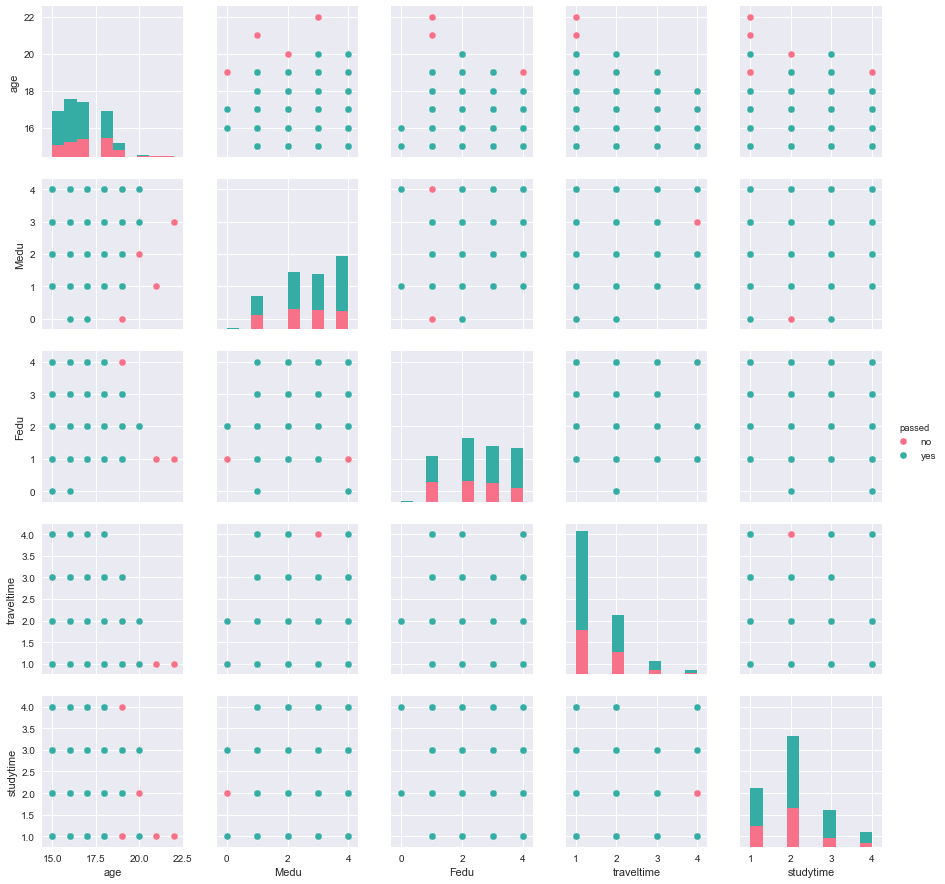

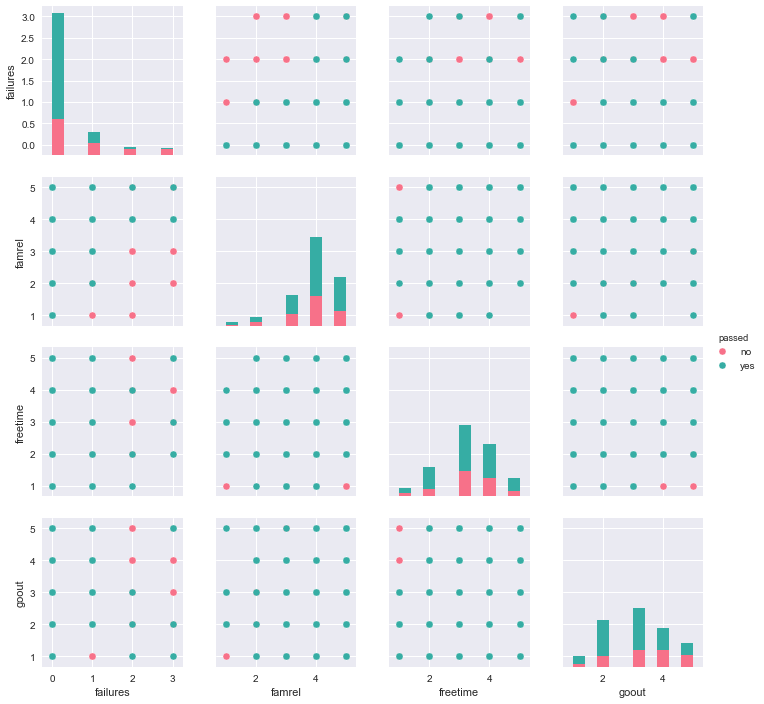

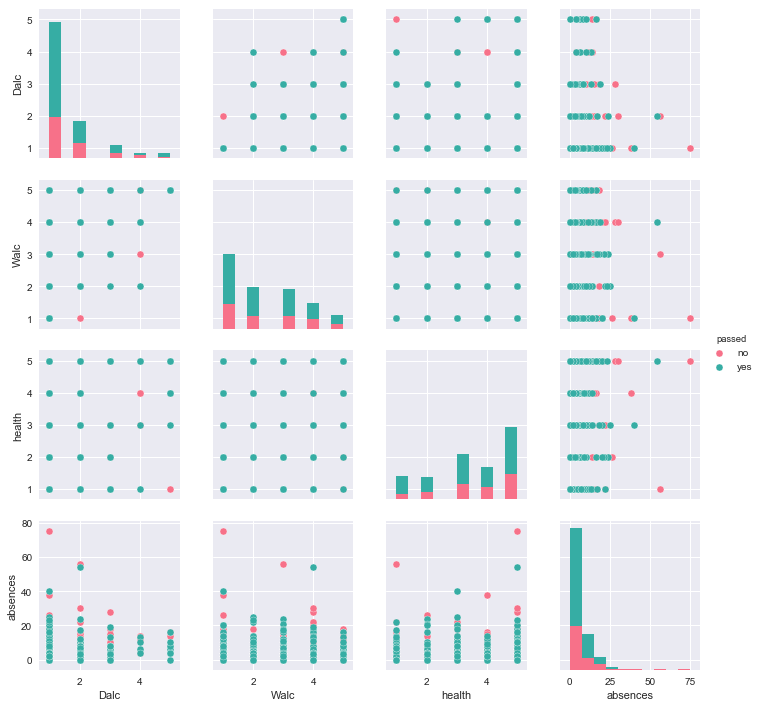

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

num_index = []
#print(X_all.dtype)
for var in X_all.columns:
    if is_numeric_dtype(X_all[var]) == True:
        num_index.append(var)
        
num_data = X_all.loc[:,num_index]
num_data = pd.DataFrame(num_data)

table_1 = pd.concat([num_data, y_all], axis=1)
table_11 = table_1.iloc[:,[0,1,2,3,4,13]]
table_12 = table_1.iloc[:,[5,6,7,8,13]]
table_13 = table_1.iloc[:,[9,10,11,12,13]]
 
g = sns.pairplot(table_11, hue = "passed", palette = "husl")
plt.show()
g2 = sns.pairplot(table_12, hue = "passed", palette = "husl")
plt.show()
g3 = sns.pairplot(table_13, hue = "passed", palette = "husl")
plt.show()

#### Describing numeric data
Apparently it is not necessary to treat outliers in these features.

In [89]:
print(X_all.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988


#### Data Visualization

In the graphs below, we see some interactions between variables, because of that we'll create some variables in the model.

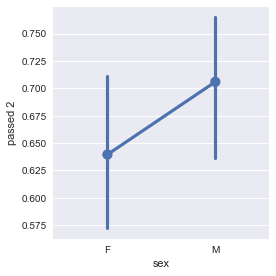

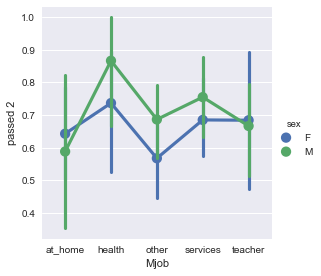

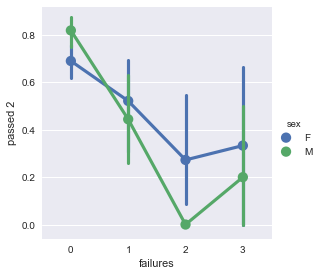

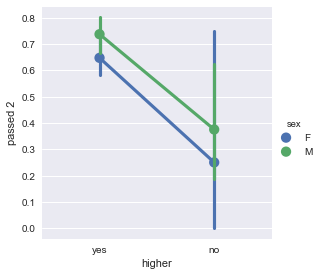

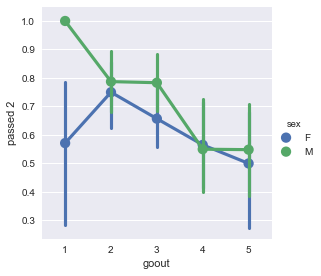

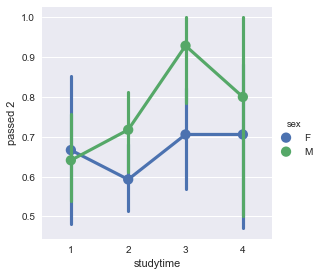

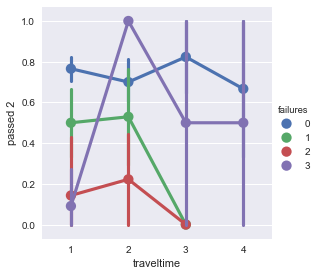

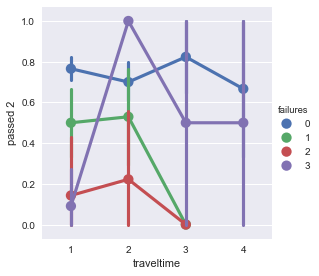

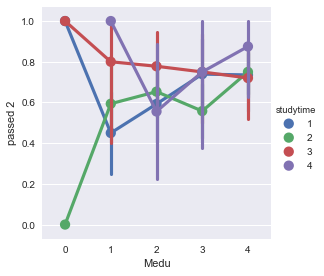

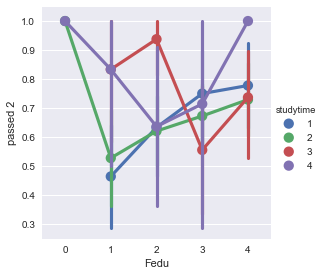

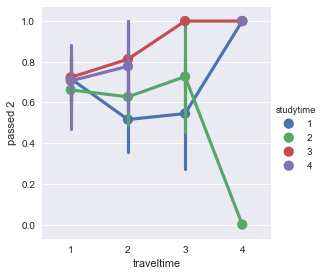

In [115]:
#count unique values in columns and plot
len_array = []
for var in student_data.columns:
    current_len  = len(student_data[var].unique())
    len_array.append(current_len)

cat_index = []
for i in range(len(len_array)):
    if len_array[i] <= 7:
        cat_index.append(i)

cat_data = student_data.iloc[:,cat_index]
cat_data = pd.DataFrame(cat_data)
#print(cat_data.head(10))

cat_data['passed 2'] = cat_data['passed'].replace(['yes', 'no'], [1, 0])

sns.factorplot(x = 'sex', y = 'passed 2', data = cat_data)
sns.factorplot(x = 'Mjob', y = 'passed 2', hue = 'sex', data = cat_data)
sns.factorplot(x = 'failures', y = 'passed 2', hue = 'sex', data = cat_data)
sns.factorplot(x = 'higher', y = 'passed 2', hue='sex', data = cat_data)
sns.factorplot(x = 'goout', y = 'passed 2', hue = 'sex', data = cat_data)
sns.factorplot(x = 'studytime', y = 'passed 2', hue = 'sex', data = cat_data)
sns.factorplot(x = 'traveltime', y = 'passed 2', hue = 'failures', data = cat_data)
sns.factorplot(x = 'traveltime', y = 'passed 2', hue = 'failures', data = cat_data)
sns.factorplot(x = 'Medu', y = 'passed 2', hue = 'studytime', data = cat_data)
sns.factorplot(x = 'Fedu', y = 'passed 2', hue = 'studytime', data = cat_data)
sns.factorplot(x = 'traveltime', y = 'passed 2', hue = 'studytime', data = cat_data)

#print(pd.crosstab(cat_data.studytime,cat_data.Fedu))
plt.show()



### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [116]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)

X_all['fail_study'] = X_all['failures']*X_all['studytime']
X_all['fail_travel'] = X_all['failures']*X_all['traveltime']
X_all['travel_study'] = X_all['traveltime']*X_all['studytime']
X_all['Fedu_study'] = X_all['Fedu']*X_all['studytime']
X_all['Medu_study'] = X_all['Medu']*X_all['studytime']


print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))
y_all.head()

Processed feature columns (53 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'fail_study', 'fail_travel', 'travel_study', 'Fedu_study', 'Medu_study']


0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [117]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.24 ,random_state = 20171007)

print "Training set has {} samples and {} features.".format(X_train.shape[0], X_train.shape[1])
print "Testing set has {} samples and {} features.".format(X_test.shape[0], X_test.shape[1])

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train
 

Training set has 300 samples and 53 features.
Testing set has 95 samples and 53 features.


208    yes
364    yes
350     no
126    yes
265    yes
262    yes
37     yes
110    yes
391    yes
256    yes
259     no
121    yes
241    yes
138    yes
267    yes
314    yes
224    yes
190    yes
384     no
80     yes
7       no
203     no
201    yes
376    yes
13     yes
114     no
76     yes
25      no
71     yes
228     no
      ... 
14     yes
352     no
106     no
58      no
11     yes
200    yes
272    yes
177     no
225     no
132    yes
112    yes
362    yes
286    yes
317     no
335    yes
46     yes
252     no
22     yes
56     yes
329    yes
255     no
119    yes
288    yes
26     yes
143    yes
146     no
280     no
135     no
323    yes
300    yes
Name: passed, Length: 95, dtype: object

## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **
All of them could be tested in this problem, but I'll choose Random Forest, Gradient Boosting, Support Vector Machine.

**Random Forest**
- Strengths: since Random Forest splits the data in subpopulations and sort some variables to each split, it's an algorithm that avoids overfitting. This model is not influenced by outliers. Random Forests works with both continuous and categorical input variables. It performs well in classification problems.
- Weaknesses: regression models (response variable is continuous). Interpretation is not easy, we don't know the behaviour from variables that explains the classes in the target variable.
- It's good candidate since this algorithm works well with categorical and continuous variables, and Random Forests performs well with a lot variables.
    
    
**Gradient Boosting**
- Strengths: the Gradient Boosting model combines decision trees as RFs but in a different method. It trains one tree at a time, where each new tree helps to correct errors made by previously trained trees. With each tree added, the model becomes even more expressive. Because of that GB always has good results.
- It is a good candidate to be tested in this database for the same reason that random forest.


**Support Vector Machine**
- Strengths: This model works with outliers, and performs well with short data and is versatile because allows to use kernel functions in the data.
- Weaknesses: this model does not perform well when data has a lot of noise and because of complexity it is not good for big datasets.
- Our training data is short (300 rows) and it is good for this algorithm.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [118]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [119]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# TODO: Initialize the three models
clf_A = RandomForestClassifier(random_state = 20170710)
clf_B = GradientBoostingClassifier(random_state = 20170710)
#clf_B = GaussianNB()
clf_C = SVC()

# TODO: Set up the training set sizes
X_train_100 = X_train.iloc[range(100),:]
y_train_100 = y_train.iloc[range(100)]

X_train_200 = X_train.iloc[range(200),:]
y_train_200 = y_train.iloc[range(200)]

X_train_300 = X_train
y_train_300 = y_train

# TODO: Execute the 'train_predict' function for each classifier and each training set size
train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)

train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)

train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)

Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0690 seconds
Made predictions in 0.0120 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0090 seconds.
F1 score for test set: 0.7407.
Training a RandomForestClassifier using a training set size of 200. . .
Trained model in 0.0330 seconds
Made predictions in 0.0080 seconds.
F1 score for training set: 0.9964.
Made predictions in 0.0080 seconds.
F1 score for test set: 0.7852.
Training a RandomForestClassifier using a training set size of 300. . .
Trained model in 0.0370 seconds
Made predictions in 0.0080 seconds.
F1 score for training set: 0.9901.
Made predictions in 0.0080 seconds.
F1 score for test set: 0.8031.
Training a GradientBoostingClassifier using a training set size of 100. . .
Trained model in 0.0860 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7770.
Training a GradientBoostingC

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Random Forest**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.0710         |         0.011          |           1      |    0.7407       |
| 200               |        0.0330          |         0.0080          |           0.9964 |    0.7852       |
| 300               |          0.0520  |         0.0160          |     0.9901       |    0.8031   |

** Classifer 2 - Gradient Boosting**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0850          |   0                |     1            |   0.777                |
| 200               |     0.0790             |      0.0020                  |          0.9929        |  0.7727               |
| 300               |           0.1340              |      0.0020                 |       0.9807           |     0.7463     |

** Classifer 3 - SVM**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |              0.0020     |     0.0020             |        0.8857     |     0.8188        |
| 200               |              0.0050     |         0.0020     |        0.8939          |     0.8054         |
| 300               |          0.0070         | 0.0030                 |   0.8850               |    0.8163         |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** The SVM model is the best model considering time(training and prediction), and it has the highest score in testing data.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **
I would say:
"Our main goal was to predict which students will graduate or not. Wefdsfds

The algorithm that works in this model identifies the probability of a student graduates or not in the school, from this probability we identidy the best cutoff and we can establish if he will graduate or not.
How does it happen? Well, this model we applied in the data, Support Vector Machine, learns from the data, it identifies the features, the information that best splits both groups, the group that graduated and who did not. We had information about the student, about their routines, the time they spent in study, their habits, their genders, and our principal variable: passou ou nao. From this the model attributes a probability. When we a nova turma de estudantes, buscaremos essas mesmas informações, e a partir delas conseguiremos aplicar o aprendizado da máquina e entender se ele vai ou não se graduar . Com isso seremos capazes e realizar ações para revertermos o quadro.
Thanks"

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [182]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer, f1_score, fbeta_score
from sklearn.model_selection import StratifiedKFold

# TODO: Create the parameters list you wish to tune
parameters = dict(kernel = ['rbf', 'poly','sigmoid'], C = [0.01, 0.1, 1, 10, 100, 1000], gamma = [0.00001,0.0001,0.001,0.01,0.1,1],class_weight = ['balanced'])
 
# TODO Initialize the classifier
clf = SVC( probability=True)

# TODO: Make an f1 scoring function using 'make_scorer' 
def performance (y_true, y_predict):
    score = f1_score(y_true, y_predict, pos_label = 'yes')
    return score
f1_scorer = make_scorer(performance)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, f1_scorer, cv = StratifiedKFold(shuffle = False ,n_splits=8, random_state =4552))
# TODO: Fit the grid search object to the training data and find the optimal parameters

start = time()
grid_obj = grid_obj.fit(X_train, y_train)
clf_bestparams = grid_obj.best_params_
end = time()

print "Find best parameterers in {:.4f} seconds.".format(end - start)   
print(clf_bestparams)
# Get the estimator


clf = grid_obj.best_estimator_
print(clf)
y_score = clf.predict(X_test)

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Find best parameterers in 48.8200 seconds.
{'kernel': 'rbf', 'C': 10, 'gamma': 0.0001, 'class_weight': 'balanced'}
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Made predictions in 0.0080 seconds.
Tuned model has a training F1 score of 0.8188.
Made predictions in 0.0020 seconds.
Tuned model has a testing F1 score of 0.8143.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: ** 
The final F<sub>1</sub> score:
- Training data:  81,88% 
- Testing: 81,43%

Actually it's close to the untuned model, and the parameters are:
- 'kernel': 'rbf', 'C': 10, 'gamma': 0.0001

Probably this is a simple data and in this case the parameters did not influenced so much in the F<sub>1</sub> score.


### Additional analysis
#### ROC CURVE for final model

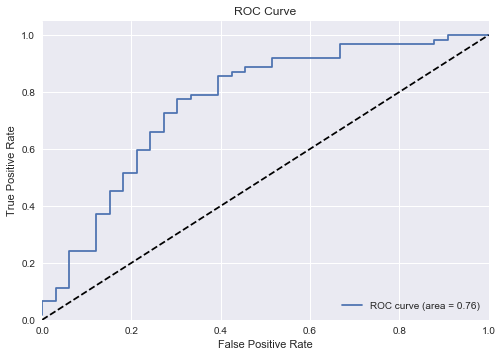

In [193]:
from sklearn.metrics import roc_curve, auc

y_score = clf.predict_proba (X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1],pos_label='yes')
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Precision and Recall

In [218]:
from sklearn.metrics import classification_report, confusion_matrix
 
y_pred = clf.predict (X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

             precision    recall  f1-score   support

         no       0.71      0.36      0.48        33
        yes       0.73      0.92      0.81        62

avg / total       0.72      0.73      0.70        95



array([[12, 21],
       [ 5, 57]])

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.